# **Assignment 6: Providing Data-driven Suggestions for HR**

This assignment is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a fictional consulting firm.

Stages of workflow

- Plan
- Analyze
- Construct 
- Execute

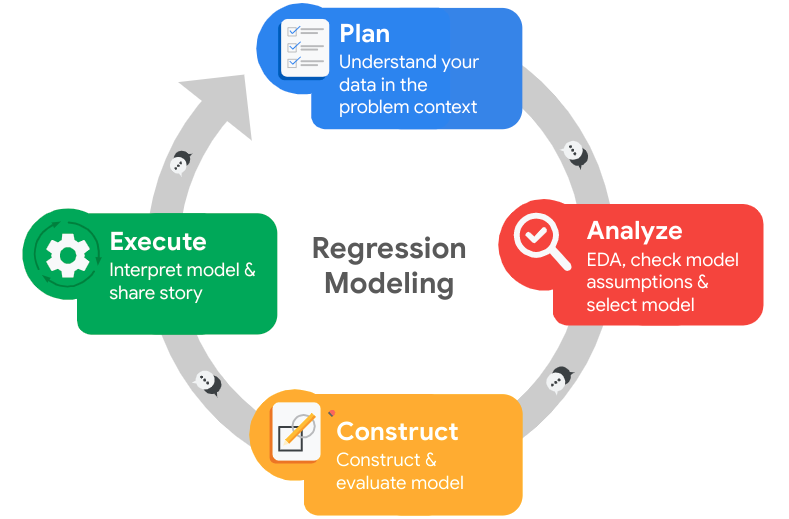



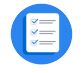  

# Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it may be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭 
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? 
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- Do you have any ethical considerations in this stage? 




[Double-click to enter your responses here.]
* The stake holders are the Heads and other members of the HR department at Salifort Motors.
* The major goal to accomplish is to determine the major factors that can influence an employee to leave.
* The dataset consist of 14,999 rows, 10 columns, with variables that describe satisfaction level, performance level, department and salaries amongst others of unique staffs in an organization.
* One of the most significant ethical concerns while working with this dataset is data privacy, but since the names of the staffs are not included, i could say that the aspect of data privacy has been resolved.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

### Load dataset

In [2]:
# Load dataset into a dataframe
hr_df = pd.read_csv("HR_dataset.csv")


# Display first few rows of the dataframe
hr_df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# creating a copy of the dataset
hr_cpy = hr_df.copy()

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 



### Gather basic information about the data

In [4]:
# Gather basic information about the data
hr_cpy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr_cpy.shape

(14999, 10)

In [6]:
hr_cpy['satisfaction_level'].value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
hr_cpy.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
hr_cpy.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
hr_cpy = hr_cpy.rename(columns={"satisfaction_level":"SatisfactionLevel", "last_evaluation":"LastEvaluation", 
                                  "number_project":"NumberProject", "average_montly_hours":"AverageMonthlyHours",
                                 "time_spend_company":"tenure", "Work_accident":"WorkAccident", "left":"LeftCompany",
                                 "promotion_last_5years":"Promotion5years"})


# Display all column names after the update
hr_cpy.columns


Index(['SatisfactionLevel', 'LastEvaluation', 'NumberProject',
       'AverageMonthlyHours', 'tenure', 'WorkAccident', 'LeftCompany',
       'Promotion5years', 'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
hr_cpy.isna().sum()


SatisfactionLevel      0
LastEvaluation         0
NumberProject          0
AverageMonthlyHours    0
tenure                 0
WorkAccident           0
LeftCompany            0
Promotion5years        0
Department             0
salary                 0
dtype: int64

There are no missing values in the data.

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
hr_cpy.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [12]:
hr_cpy.duplicated().sum()

3008

In [13]:
3008/14999*100

20.05467031135409

3,008 rows contain duplicates. That is 20% of the data.

In [14]:
# Inspect some rows containing duplicates as needed
hr_cpy[hr_cpy.duplicated()].head()


,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed

hr_cpys = hr_cpy.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
hr_cpys.head()


,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
hr_cpys.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

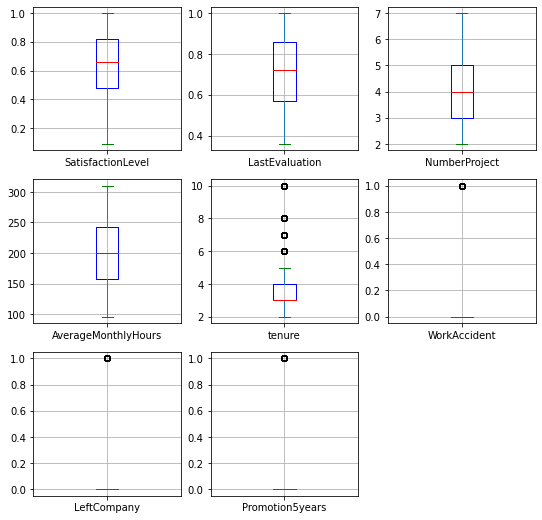

In [17]:
plt.figure(figsize=(9, 9)) 
plt.subplot(3, 3, 1)
hr_cpys.boxplot(column=['SatisfactionLevel'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 2, )
hr_cpys.boxplot(column=['LastEvaluation'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 3, )
hr_cpys.boxplot(column=['NumberProject'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 4, )
hr_cpys.boxplot(column=['AverageMonthlyHours'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 5, )
hr_cpys.boxplot(column=['tenure'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 6)
hr_cpys.boxplot(column=['WorkAccident'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 7, )
hr_cpys.boxplot(column=['LeftCompany'], color=dict(boxes='b', medians='r', caps='g'))
plt.subplot(3, 3, 8, )
hr_cpys.boxplot(column=['Promotion5years'], color=dict(boxes='b', medians='r', caps='g'))
plt.show()

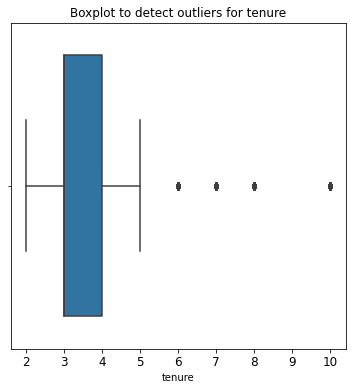

In [18]:
# Create a boxplot to clearly visualize outliers in tenure
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=hr_cpys['tenure'])
plt.show()

The boxplot above shows that there are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [19]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = hr_cpys['tenure'].quantile(0.25)
print("25th Percentile:", percentile25)

# Compute the 75th percentile value in `tenure`
percentile75 = hr_cpys['tenure'].quantile(0.75)
print("75th Percentile:", percentile75)


# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25
print("value of iqr:", iqr)

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = hr_cpys[(hr_cpys['tenure'] > upper_limit) | (hr_cpys['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))



25th Percentile: 3.0
75th Percentile: 4.0
value of iqr: 1.0
Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [20]:
upperlimit = hr_cpys[hr_cpys['tenure'] > upper_limit]
upperlimit.shape

(824, 10)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

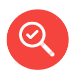
# Analyze Stage
- Perform EDA (analyze relationships between variables) 



💭 
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data? 
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

Create a stacked boxplot showing `AveragemonthlyHours` distributions for `NumberProject`, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving when relating to how big the sample sizes that they represent are. So, we would also plot a stacked histogram to visualize the distribution of `NumberProject` for those who stayed and those who left.

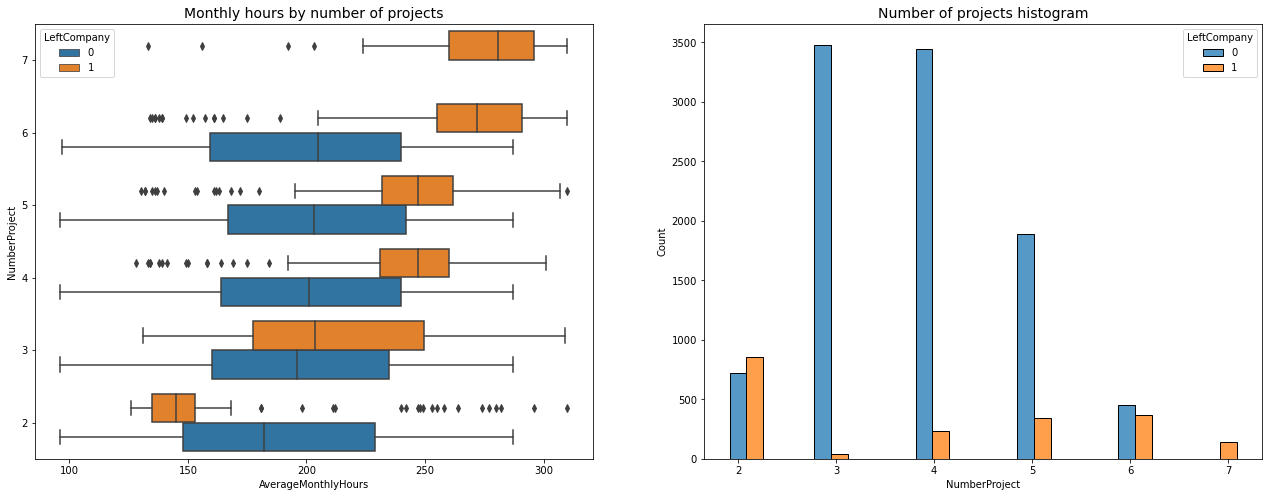

In [21]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `AverageMonthlyHours` distributions for `NumberProject`, comparing employees who stayed versus those who left
sns.boxplot(data=hr_cpys, x='AverageMonthlyHours', y='NumberProject', hue='LeftCompany', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = hr_cpys[hr_cpys['LeftCompany']==0]['NumberProject']
tenure_left = hr_cpys[hr_cpys['LeftCompany']==1]['NumberProject']
sns.histplot(data=hr_cpys, x='NumberProject', hue='LeftCompany', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()


It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/week&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.



As the next step, you could confirm that all employees with seven projects left.

In [22]:
# Get value counts of stayed/left for employees with 7 projects
hr_cpys[hr_cpys['NumberProject']==7]['LeftCompany'].value_counts()

1    145
Name: LeftCompany, dtype: int64

This confirms that all employees with 7 projects did leave. 

Next, you could examine the average monthly hours versus the satisfaction levels. 

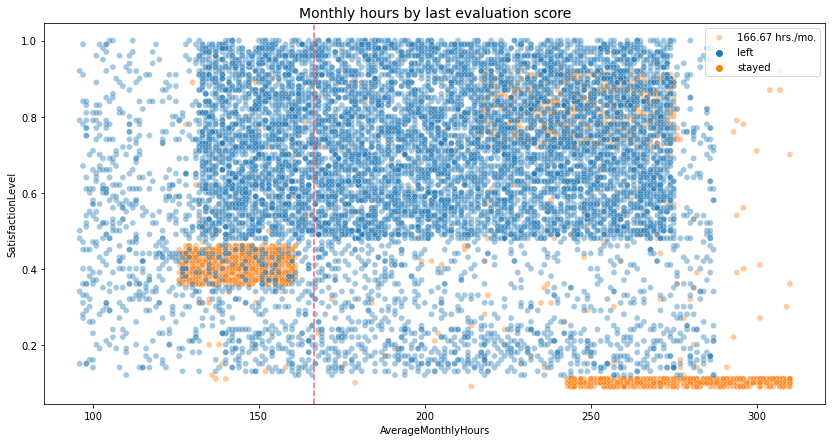

In [23]:
# Create a plot as needed 

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(14, 7))
sns.scatterplot(data=hr_cpys, x='AverageMonthlyHours', y='SatisfactionLevel', hue='LeftCompany', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

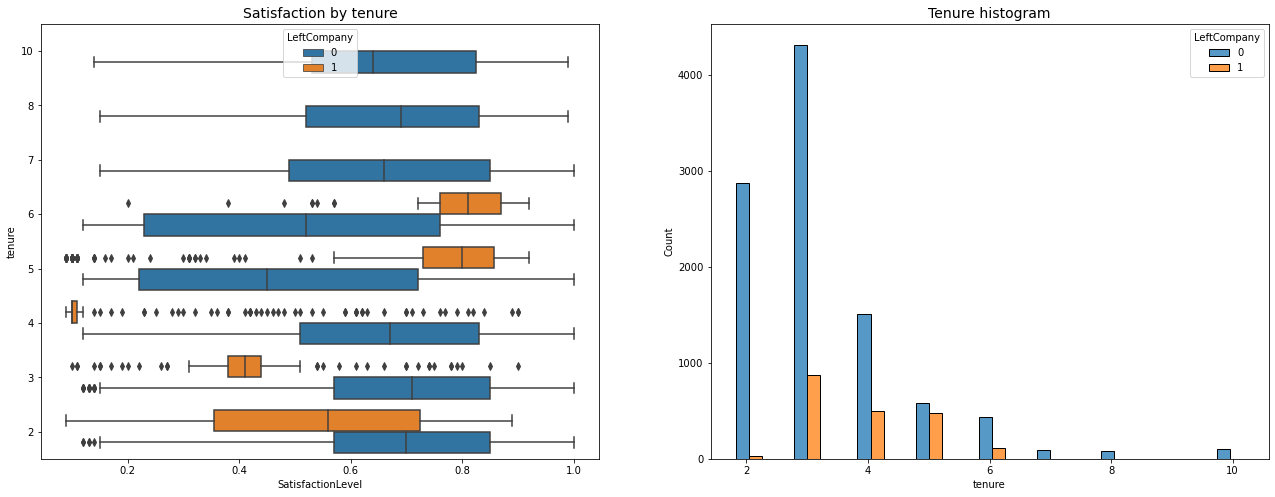

In [24]:
# Create a plot as needed 
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `SatisfactionLevel` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=hr_cpys, x='SatisfactionLevel', y='tenure', hue='LeftCompany', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = hr_cpys[hr_cpys['LeftCompany']==0]['tenure']
tenure_left = hr_cpys[hr_cpys['LeftCompany']==1]['tenure']
sns.histplot(data=hr_cpys, x='tenure', hue='LeftCompany', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

From the plot above we can see that;
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [25]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
hr_cpys.groupby(['LeftCompany'])['SatisfactionLevel'].agg([np.mean,np.median])

,mean,median
LeftCompany,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median values for the satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, we examine salary levels for different tenures.

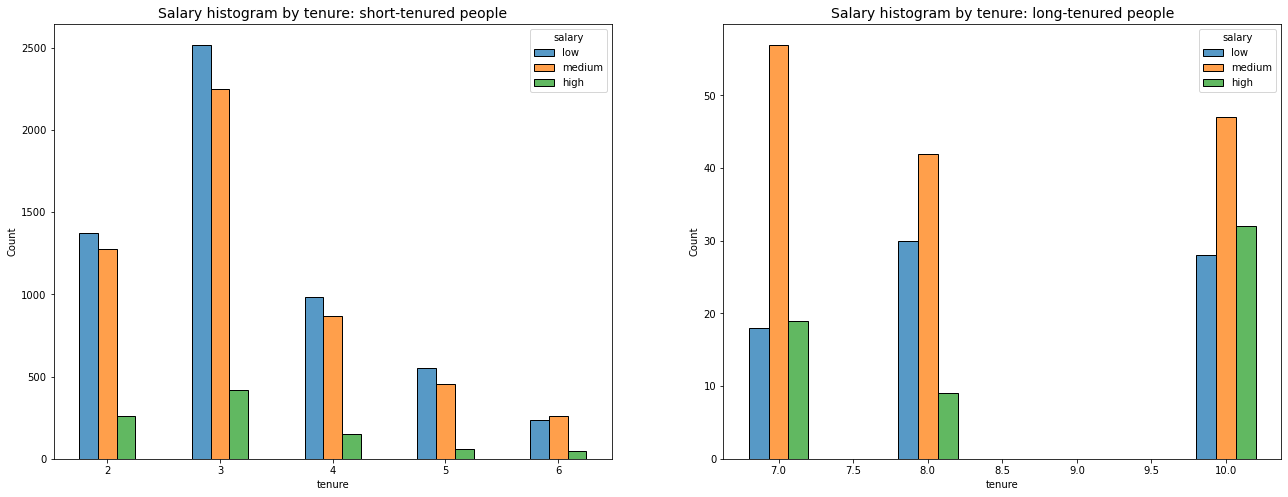

In [26]:
# Create a plot as needed 

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = hr_cpys[hr_cpys['tenure'] < 7]

# Define long-tenured employees
tenure_long = hr_cpys[hr_cpys['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees ie it did not consist of many higher paid employees. 

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `AverageMonthlyHours` versus `LastEvaluation`.

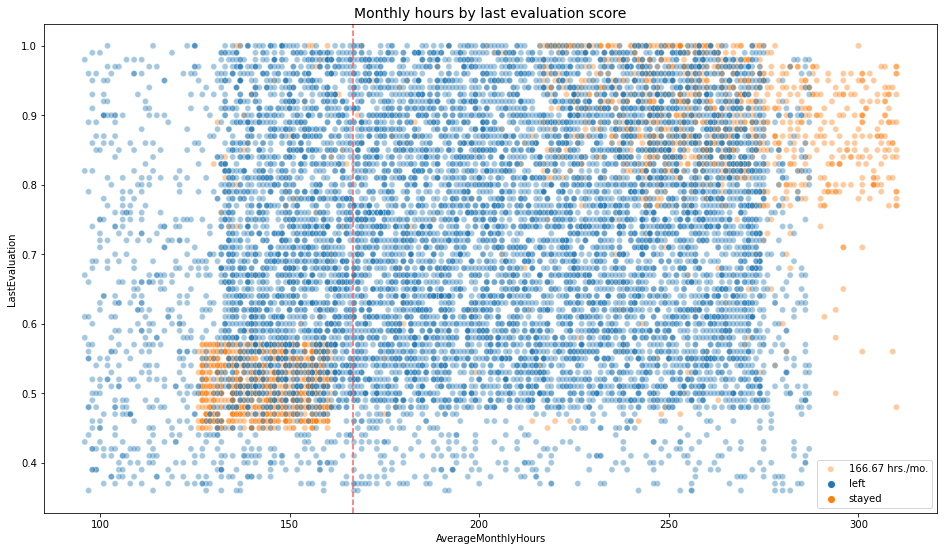

In [27]:
# Create scatterplot of `AverageMonthlyHours` versus `LastEvaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=hr_cpys, x='AverageMonthlyHours', y='LastEvaluation', hue='LeftCompany', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well(evaluation level of approximately 0.75 to 1.0) and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores(evaluation score of approximately 0.45 to 0.58). 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, we examine whether employees who worked very long hours were promoted in the last five years.

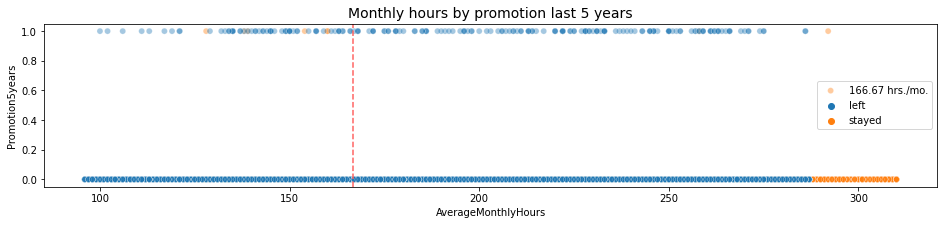

In [28]:
# Create plot to examine relationship between `AverageMonthlyHours` and `LeftCompany`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=hr_cpys, x='AverageMonthlyHours', y='Promotion5years', hue='LeftCompany', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, we inspect how the employees who left are distributed across departments.

In [29]:
# Display counts for each department
hr_cpys["Department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64

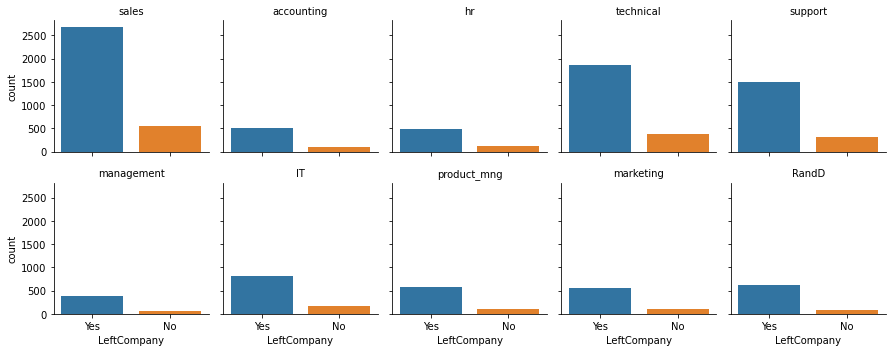

In [30]:
# Create catplot to compare department distribution of employees who left to that of employees who didn't
g = sns.catplot(x="LeftCompany", col="Department", col_wrap= 5,
                data=hr_cpys,
                kind="count", height=2.5, aspect=1)
(g.set_titles("{col_name}"),  g.set_xticklabels(["Yes", "No"]))
plt.show()


There are more departments that do not differ significantly in the proportion of employees who left to those who stayed.With the exception of the Management, Technical and Support department.

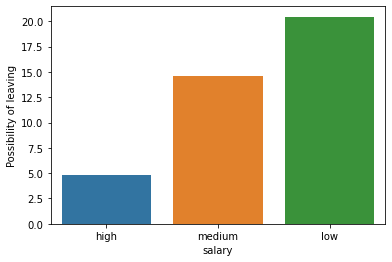

In [31]:
# Create barplot to compare salary distribution of employees who likely left the company
# Visualization of Salary vs Left Company
sns.barplot(data = pd.DataFrame(hr_cpys.groupby('salary').mean()['LeftCompany']*100).reset_index().sort_values(by='LeftCompany').rename({'LeftCompany':'Possibility of leaving'},axis=1),
           x='salary',
           y='Possibility of leaving')
plt.show()

This chart shows that employee with low income tend to leave the company at higher rate

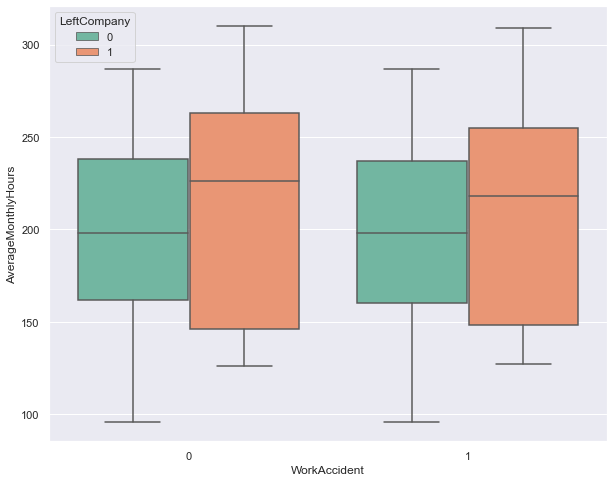

In [32]:
# Create boxplot to show the effect of 'WorkAccident', 'AverageMonthlyHours' on employees leaving or staying 
# Visualization Work Accident vs Average Monthly Hours vs Left Company
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x="WorkAccident", y="AverageMonthlyHours", hue="LeftCompany",
                 data=hr_cpys, palette="Set2")
plt.show()

This chart shows that work related accidents do not seem to have effect on the employees that left the company. Also the average amount of hours spent do not seem to have effect on work related accidents.

Lastly, we check for strong correlations between variables in the data.

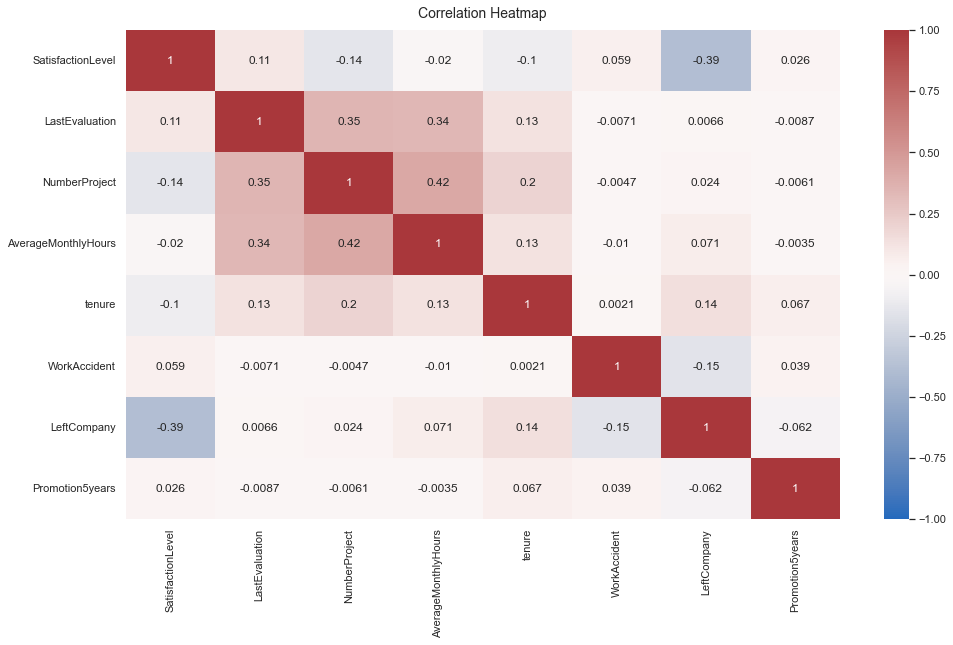

In [33]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(hr_cpy.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, Average monthly hours, and last evaluation all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

This chart shows that work related accidents do not seem to have effect on the employees that left the company. Also the average amount of hours spent do not seem to have effect on work related accidents

### Insights

[What insights can you gather from the plots you created to visualize the data?]

It appears that employees are leaving the company as a result of poor management and poor welfare packages. Leaving is tied to longer working hours, many projects, low earning power for most staff, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 











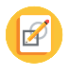
#Construct Stage
- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


### Identify the type of prediction task.

Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

### Identify the types of models most appropriate for this task.

Since the variable you want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So you could proceed with one of the two following approaches. Or, if you'd like, you could implement both and determine how they compare.

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

#### Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Start by one-hot encoding the categorical variables as needed.

In [34]:
# One-hot encode the categorical variables as needed and save resulting dataframe in a new variable
df_enc = pd.get_dummies(hr_cpys, prefix=['salary', 'dept'], columns = ['salary', 'Department'], drop_first=False)

# Display the new dataframe
df_enc.head()

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

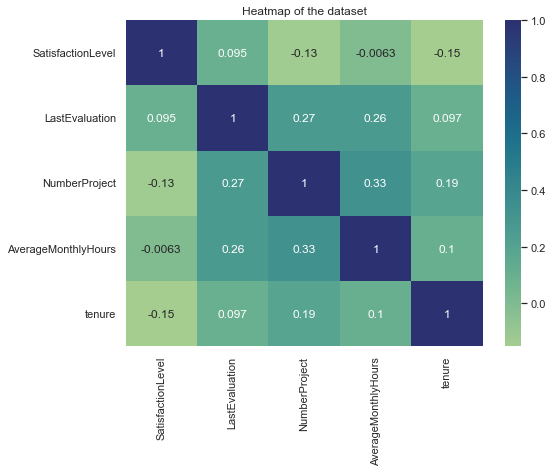

In [35]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['SatisfactionLevel', 'LastEvaluation', 'NumberProject', 'AverageMonthlyHours', 'tenure']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [36]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Isolate the outcome variable, which is the variable you want your model to predict.

In [37]:
# Isolate the outcome variable
y = df_logreg['LeftCompany']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: LeftCompany, dtype: int64

Select the features you want to use in your model. Consider which variables will help you predict the outcome variable, `LeftCompany`.

In [38]:
# Select the features you want to use in your model
X = df_logreg[['SatisfactionLevel', 'LastEvaluation', 'NumberProject', 'AverageMonthlyHours', 'tenure', 'WorkAccident', 'Promotion5years', 'salary_high', 'salary_low', 'salary_medium' , 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]

# Display the first few rows of the selected features 
X.head()

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,Promotion5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Split the data into training set and testing set.

In [39]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construct a logistic regression model and fit it to the training dataset.

In [40]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [41]:
log_clf.coef_

array([[-4.45779904e+00, -2.03140830e-01, -4.67252802e-01,
         3.57711408e-03,  1.05602087e+00, -1.54742839e+00,
        -4.03121024e-01, -1.24486814e+00,  2.59790803e-01,
        -2.05948329e-01, -8.13440850e-02, -5.42971398e-01,
        -1.32390125e-01, -1.14429184e-02, -1.44338981e-01,
        -8.22402268e-02, -2.03668693e-01,  7.86247406e-02,
        -6.34222405e-02, -7.83173687e-03]])

Test the logistic regression model: use the model to make predictions on the test set.

In [42]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

In [43]:
# Use `predict_proba()` to get probability estimates
y_pred_prob = log_clf.predict_proba(X_test)[:,1]
y_pred_prob

array([0.02918289, 0.11168126, 0.23051146, ..., 0.31550717, 0.09200987,
       0.00949571])

Create a confusion matrix to visualize the results of the logistic regression model. 

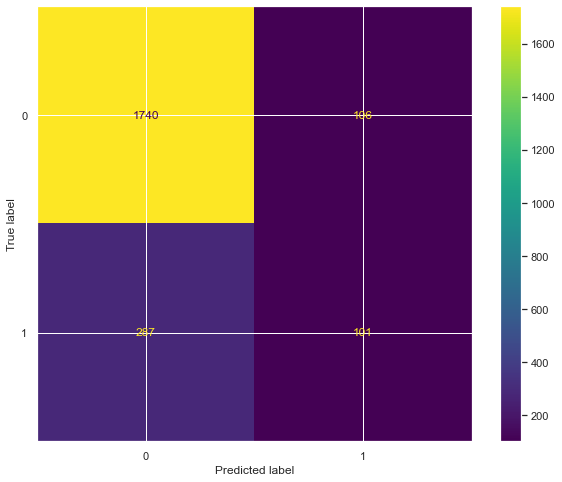

In [44]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave (1740).

False positives: The number of people who did not leave the model inaccurately predicted as leaving (106).

False negatives: The number of people who left that the model inaccurately predicted did not leave (287).

True positives: The number of people who left the model accurately predicted as leaving (101).

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the `LeftCompany` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [45]:
df_logreg['LeftCompany'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: LeftCompany, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [46]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.49      0.26      0.34       388

                 accuracy                           0.82      2234
                macro avg       0.67      0.60      0.62      2234
             weighted avg       0.79      0.82      0.80      2234



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%.

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [48]:
roc_auc_score(y_test, y_pred_prob)

0.8887201081189756

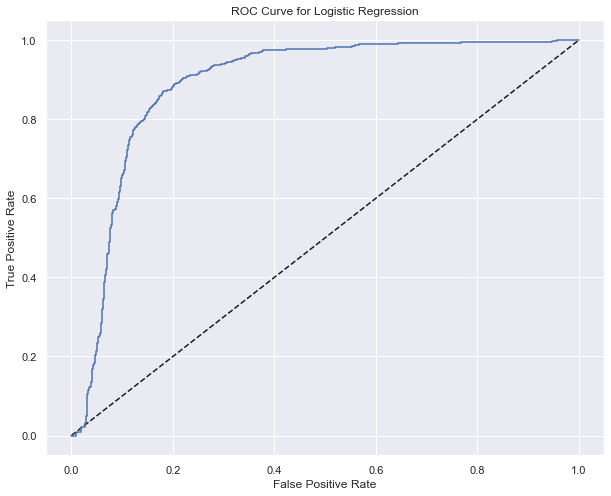

In [49]:
# generate ROC curve values fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

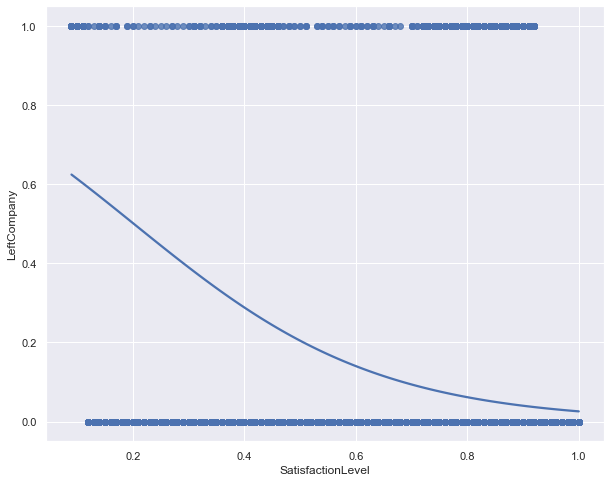

In [50]:
# Create a regplot to visualize logistic relationship between `SatisfactionLevel` and `LeftCompany`
sns.regplot(x="SatisfactionLevel", y="LeftCompany", data=df_logreg, logistic=True, ci=None);

The graph seems to indicate that the lower the satisfaction level value, the higher likehood of employee leaving the company.

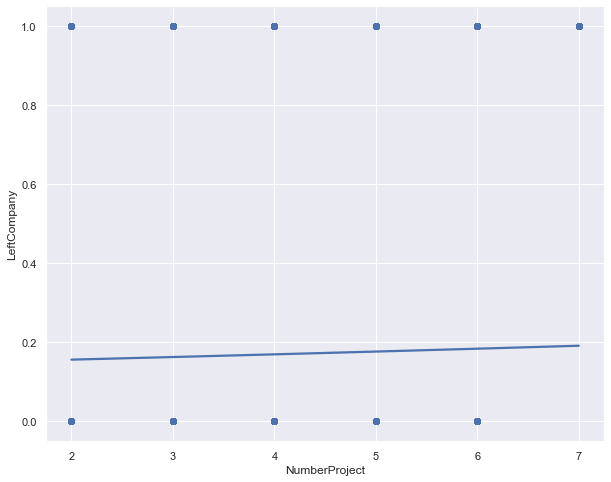

In [51]:
# Create a regplot to visualize logistic relationship between `NumberProject` and `LeftCompany`
sns.regplot(x="NumberProject", y="LeftCompany", data=df_logreg, logistic=True, ci=None);

The graph seems to indicate that the number of project an employee works on has  effect on them leaving the company

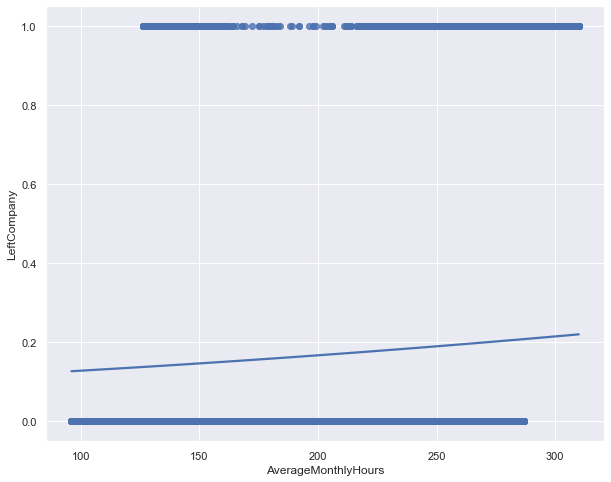

In [52]:
# Create a regplot to visualize logistic relationship between `AverageMonthlyHours` and `LeftCompany`
sns.regplot(x="AverageMonthlyHours", y="LeftCompany", data=df_logreg, logistic=True, ci=None);

The graph seems to indicate that the higher the monthly hours the higher the need for employees to leave

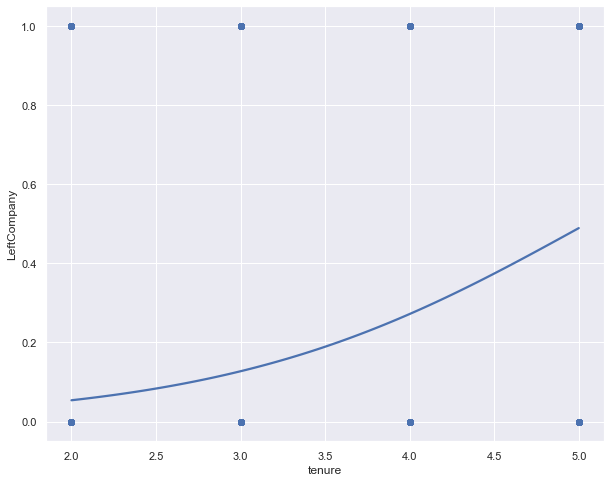

In [53]:
# Create a regplot to visualize logistic relationship between `Years In Company` and `LeftCompany`
sns.regplot(x="tenure", y="LeftCompany", data=df_logreg, logistic=True, ci=None);

The graph seems to indicate that employees who have spent 3.5 to 5 Years in the company, tend to leave the company more.

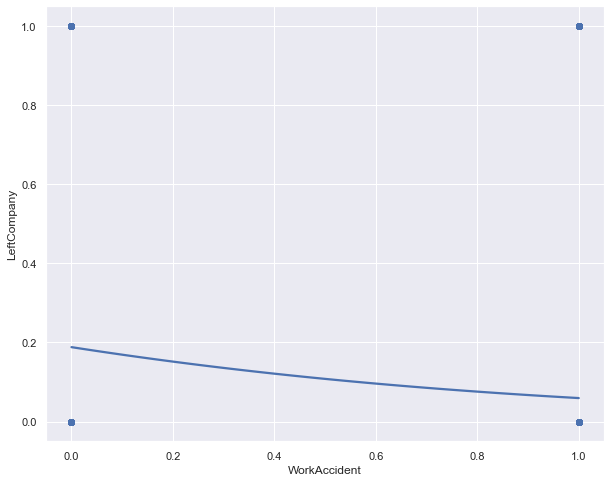

In [54]:
# Create a regplot to visualize logistic relationship between `WorkAccident` and `LeftCompany`
sns.regplot(x="WorkAccident", y="LeftCompany", data=df_logreg, logistic=True, ci=None);

Work related Accident have little to no effect on employees leaving the company

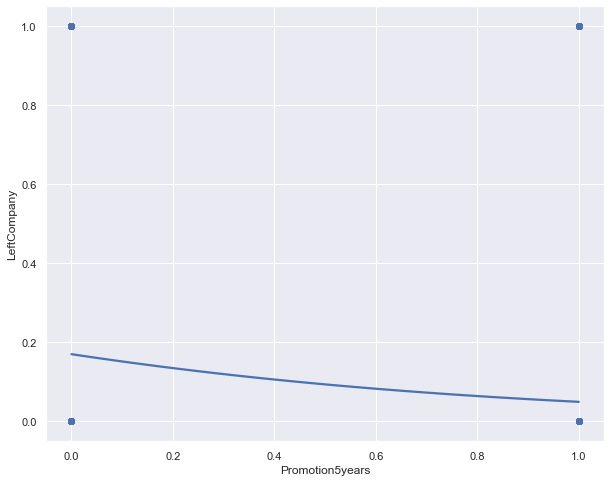

In [55]:
# Create a regplot to visualize logistic relationship between `Promotion5years` and `LeftCompany`
sns.regplot(x="Promotion5years", y="LeftCompany", data=df_logreg, logistic=True, ci=None);

Employees that have not been promoted in the last 5 years are more likely to leave the company

## Check model assumptions

#### Outcome variable is categorical

In [56]:
print(y.nunique())

2


In [57]:
y.value_counts()

0    9285
1    1882
Name: LeftCompany, dtype: int64

There are only two outcomes (i.e. binary classification of stay or leave), so we will be using Binary Logistic Regression (which is the default method we use when we specify family=Binomial in our logit models earlier)

### Linearity of independent variables and log odds

In [58]:
# creating a copy of the dataset
logreg_cpy = df_logreg.copy()

In [59]:
# Box Tidwell only works for positive values. Hence, drop values where x = 0
df_3 = logreg_cpy.drop(logreg_cpy[logreg_cpy.SatisfactionLevel == 0].index)
df_3 = logreg_cpy.drop(logreg_cpy[logreg_cpy.NumberProject == 0].index)
df_3 = logreg_cpy.drop(logreg_cpy[logreg_cpy.AverageMonthlyHours ==0].index)
df_3 = logreg_cpy.drop(logreg_cpy[logreg_cpy.tenure ==0].index)
df_3 = logreg_cpy.drop(logreg_cpy[logreg_cpy.LastEvaluation == 0].index)
df_3.head()

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [60]:
# Logistic Regression with statsmodel - Inclusion of interaction term (logit transform) as part of Box-Tidwell test
df_lt = logreg_cpy.copy()  # lt = logit transform

# Define continuous variables
continuous_var = ['SatisfactionLevel','tenure','LastEvaluation','AverageMonthlyHours','NumberProject' ]

# Add logit transform interaction terms (natural log) for continuous variable
for var in continuous_var:
    df_lt[f'{var}:Log_{var}'] = df_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log
    
df_lt.head()

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,SatisfactionLevel:Log_SatisfactionLevel,tenure:Log_tenure,LastEvaluation:Log_LastEvaluation,AverageMonthlyHours:Log_AverageMonthlyHours,NumberProject:Log_NumberProject
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-0.367682,3.295837,-0.336485,793.830591,1.386294
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-0.242800,5.545177,-0.112493,1524.778162,13.621371
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-0.236523,8.047190,-0.121158,1205.799305,8.047190
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-0.367873,3.295837,-0.340042,805.955768,1.386294
5,0.41,0.50,2,153,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-0.365555,3.295837,-0.346574,769.657002,1.386294


In [61]:
# Keep columns related to continuous variables
cols_to_keep = continuous_var + df_lt.columns.tolist()[-len(continuous_var):]
cols_to_keep

['SatisfactionLevel',
 'tenure',
 'LastEvaluation',
 'AverageMonthlyHours',
 'NumberProject',
 'SatisfactionLevel:Log_SatisfactionLevel',
 'tenure:Log_tenure',
 'LastEvaluation:Log_LastEvaluation',
 'AverageMonthlyHours:Log_AverageMonthlyHours',
 'NumberProject:Log_NumberProject']

In [62]:
import seaborn as sns
sns.set_style('darkgrid')
import math
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Redefine independent variables to include interaction terms
X_lt = df_lt[cols_to_keep]
y_lt = df_lt['LeftCompany']

# Add constant
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            LeftCompany   No. Observations:                11167
Model:                            GLM   Df Residuals:                    11156
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2754.9
Date:                Tue, 17 Jan 2023   Deviance:                       5509.7
Time:                        21:43:13   Pearson chi2:                 9.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3388
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

* We are interested in the p-values for the logit transformed interaction terms of SatisfactionLevel:Log_SatisfactionLevel,AverageMonthlyHours:Log_AverageMonthlyHours,tenure:Log_tenure, NumberProject:Log_NumberProject and LastEvaluation:Log_LastEvaluation.

* From the summary table above, we can see that the p value for LastEvaluation:Log_LastEvaluation, AverageMonthlyHours:Log_AverageMonthlyHours,and NumberProject:Log_NumberProject is <0.001, which is statistically significant, whereas the others are not.

* This means that there is non-linearity in the YearsInCompany and NumberProject Feature, and the assumption has been slightly violated

### No extreme outliers


In [64]:
# Use GLM method for logreg here so that we can retrieve the influence measures
logit_model = GLM(y, X, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            LeftCompany   No. Observations:                11167
Model:                            GLM   Df Residuals:                    11148
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3543.1
Date:                Tue, 17 Jan 2023   Deviance:                       7086.3
Time:                        21:43:28   Pearson chi2:                 8.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2386
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
SatisfactionLevel      -4.5631    

In [65]:
from scipy import stats

# Get influence measures
influence = logit_results.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df

,cooks_d,std_resid
0,0.000081,1.221296
2,0.000156,1.274413
3,0.000180,1.652113
4,0.000079,1.190992
5,0.000093,1.311876
...,...,...
11985,0.000001,0.214769
11986,0.000035,0.490473
11987,0.000411,1.433617
11992,0.000002,0.149869


In [66]:
# Set Cook's distance threshold
cook_threshold = 4 / len(X)
print(f"Threshold for Cook Distance = {cook_threshold}")

Threshold for Cook Distance = 0.00035819826273842574


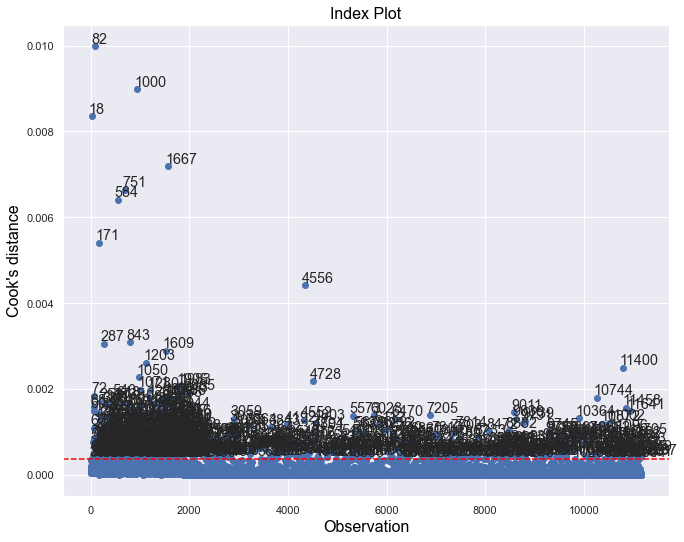

In [67]:
# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [68]:
# Find number of observations that exceed Cook's distance threshold
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(X)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Proportion of data points that are highly influential = 8.1%


In [69]:
# Find number of observations which are BOTH outlier (std dev > 3) and extreme
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(X)),1)
print(f'Proportion of highly influential outliers = {prop_extreme}%')

Proportion of highly influential outliers = 1.7%


In [70]:
# Display top 5 most extreme outliers
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
82,0.009985,8.900617
1000,0.008983,7.227648
18,0.008357,4.868249
1667,0.007190,3.085025
843,0.003086,16.239346


In [71]:
# Deep dive into index 311 (extreme outlier)
X.iloc[82]

SatisfactionLevel        0.37
LastEvaluation           0.57
NumberProject            2.00
AverageMonthlyHours    130.00
tenure                   3.00
WorkAccident             0.00
Promotion5years          0.00
salary_high              0.00
salary_low               1.00
salary_medium            0.00
dept_IT                  0.00
dept_RandD               0.00
dept_accounting          0.00
dept_hr                  0.00
dept_management          0.00
dept_marketing           0.00
dept_product_mng         0.00
dept_sales               1.00
dept_support             0.00
dept_technical           0.00
Name: 88, dtype: float64

In [72]:
y.iloc[82]  # 1=left

1

* Although data points with relative high Cook's distances do not automatically mean that they should be immediately removed from the dataset. It is essentially an indicator to highlight which data points are worth looking more into, so as to understand whether they are true anomalies or not.

* In practice, presence of “large” values is a judgement call based on the type of results to be generated and the data setdata being analyzed.

* In addition, based on our pre-defined threshold (4/N), only 1.7% of the points in the extreme outlier zone, which is small in comparison to size of dataset.

### No severe multicollinearity among X variables

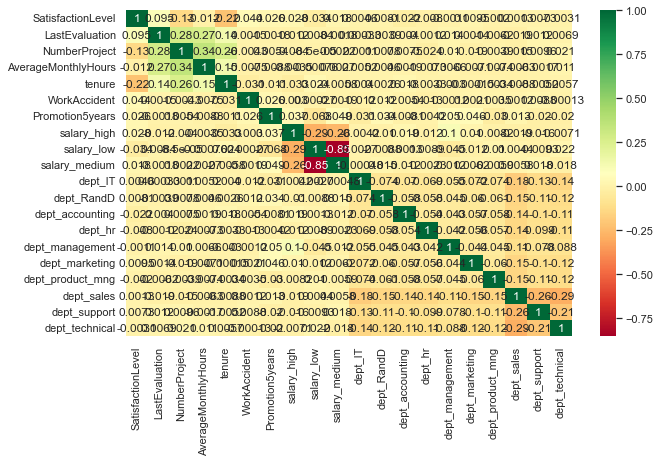

In [73]:
corrMatrix = X.corr()
plt.subplots(figsize=(10, 6))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

Not  all collinearity problems can be detected by inspection of the correlation matrix that is, it is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation.
As such, we try out the Variance Inflation Factor (VIF) to check for multi colinearity

In [74]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(X)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,SatisfactionLevel,1.089717
1,LastEvaluation,1.156860
2,NumberProject,1.260105
3,AverageMonthlyHours,1.181020
4,tenure,1.130278
5,WorkAccident,1.003669
6,Promotion5years,1.014108
7,salary_high,inf
8,salary_low,inf
9,salary_medium,inf


* The threshold for VIF is usually 5 (i.e. values above 5 means there is presence of multicollinearity)

* This dataframe shows that VIF value for most of the features are less than 5, this shows that there is no multicollinearity, as such this assumption satisfied

### Observations are independent of each other

In [75]:
# Setup logistic regression model (using GLM method so that we can retrieve residuals)
logit_model = GLM(y, X, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            LeftCompany   No. Observations:                11167
Model:                            GLM   Df Residuals:                    11148
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3543.1
Date:                Tue, 17 Jan 2023   Deviance:                       7086.3
Time:                        21:44:58   Pearson chi2:                 8.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2386
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
SatisfactionLevel      -4.5631    

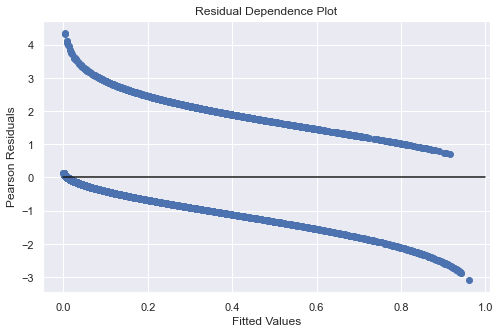

In [76]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(
            111,
            title="Residual Dependence Plot",
            xlabel="Fitted Values",
            ylabel="Pearson Residuals")

# ax.scatter(logit_results.mu, stats.zscore(logit_results.resid_pearson))
ax.scatter(logit_results.mu, stats.zscore(logit_results.resid_deviance))
ax.axis("tight")
ax.plot([0.0, 1.0], [0.0, 0.0], "k-");

We have  two lines of points, because we predict a probability for a variable taking values 0 or 1. If the tree value is 0, then we always predict more, and residuals have to be negative and if the true value is 1, then we underestimate, and residuals have to be positive .  there is also a monotonous relationship among the two points.

### Sufficiently large sample size

In [77]:
# Find total number of features
len(X)

11167

In [78]:
# Get value counts for independent variables (mainly focus on categorical)
X['NumberProject']. value_counts()

4    3438
3    3302
5    2030
2    1514
6     738
7     145
Name: NumberProject, dtype: int64

In [79]:
# Get value counts for independent variables (mainly focus on categorical)
for col in X.columns.to_list()[1:]:
    if X.dtypes[col] == 'int64': # Keep categorical variables only
        print(X[col].value_counts())

4    3438
3    3302
5    2030
2    1514
6     738
7     145
Name: NumberProject, dtype: int64
156    107
160    107
149    106
151    102
135     98
      ... 
297      5
298      5
303      5
302      5
299      5
Name: AverageMonthlyHours, Length: 215, dtype: int64
3    5190
2    2910
4    2005
5    1062
Name: tenure, dtype: int64
0    9465
1    1702
Name: WorkAccident, dtype: int64
0    11006
1      161
Name: Promotion5years, dtype: int64


* Rule of thumb is to have at least 10-20 instances of the least frequent outcome for each predictor variable in your model

* From the value counts above, we can see that this assumption is not fully satisfied

* Another rule of thumb is to have at least 500 observations in the entire dataset

* Overall, we have 2338 observations, which is a decent dataset size to work with.

💭 
### Reflect on these questions as you complete the constructing stage.

* Do you notice anything odd?


In the case of sufficiently large sample size there seems to be presence of least frequent outcome among categorical variables in the feature dataset.

Also the dataset seems to have small portion 1.7% of extreme outliers.

* Which independent variables did you choose for the model, and why?

I chose to work with Satisfaction level, Salary, Tenure, Work Accident, Department, Last Evaluation, Average Monthly Hours and Promotion in 5 years variables this is because they show no signs of multicolinearity.

* Are each of the assumptions met?

The Assumption of no severe multicolinearity was met.

The assumption of large sample size is not really met due to unlikely presence of recurrent of least frequent outcome among the predictive variables.

The assumption of outcome variable being categorical was met.

The Assumption of linearity was slightly violated as there was non linearity between the Years in company and No Projects variables.

* How well does your model fit the data?

we can use this model to predict whether an Employee will leave a job or not with an accuracy of 82%

* Can you improve it? Is there anything you would change about the model?

I will consider standardizing the columns before seperating  the testing and training dataset.

* Do you have any ethical considerations in this stage?

Ethical Consideration will be on the exposure of employee details to foreigners while working on the dataset.

### What business recommendations do you propose based on the models built?
We know that the variable for LeftCompany was encoded as Stay = 0, Left = 1. This means that an improvement in key feature variables like Salary, Promotion in 5 years, tackling Work Accidents, Tenure gratification and also upgrade in welfare packages for some departments like Sales, Technical and Support will reduce the proportion of employees leaving the company.

### Summary of model results

*   Logistic regression accurately predicted the Employees Leaving 82 percent of the time.  
*   You can verify that the lower left and top right corners are both under 300, which are relatively low numbers. These numbers relate to false negatives and false positives.There seems to be little difference in the number of false positives and false negatives
* The Classification report gave a precision value of 86% for Staying and 49% for employees who are leaving. ie  there is 86% proportion of employees predicted not to leave which actually did not leave, and 49% proportion of employee predicted to leave which actually left.  


### Conclusion, Recommendations, Next Steps

*  Employees that earn well, recieve promotion for their efforts, and are well compensated for thier contributions tend to stay longer in the compaany. As such improving staff salary, welfare package and good reward system should lead to better employee retention. 
*  The model is 82 percent accurate. This is something that can be improved to provide better recommendation to reduce employee attrition. 
*  The success of the model suggests that the company should invest more effort into model developement to examine if adding more independent variables or improving on the dataset will lead to better results . Building this model could not only be useful in predicting whether a employee would stay or not, but also lead to a better understanding of what independent variables lead to happier employees. 
* A conducive work environment is important for meeting company goals and aspiration and the employees make up structure of any company as such employers should try and provide safe, secure, growth friendly and result driven environment for thier staff.